In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import keras
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224,224]

In [4]:
train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/valid'

In [5]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [7]:
for layer in vgg19.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [9]:
x = Flatten()(vgg19.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model.compile(optimizer="sgd",
              loss="categorical_crossentropy",
              metrics=[keras.metrics.Precision(name='Precision'),
                       keras.metrics.Recall(name='Recall'), 
                       keras.metrics.SpecificityAtSensitivity(0.5, name='Specificity'),
                       keras.metrics.SensitivityAtSpecificity(0.5, name='Sensitivity'),
                       keras.metrics.AUC(name = 'AUC'),
                       'accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [16]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set))

Epoch 1/20
574/574 [==============================] - 6492s 11s/step - loss: 9.9703 - Precision: 0.3902 - Recall: 0.3754 - Specificity: 0.8632 - Sensitivity: 0.5587 - AUC: 0.7095 - accuracy: 0.3825 - val_loss: 6.0076 - val_Precision: 0.4688 - val_Recall: 0.4528 - val_Specificity: 0.9231 - val_Sensitivity: 0.6336 - val_AUC: 0.7614 - val_accuracy: 0.4593
Epoch 2/20
574/574 [==============================] - 290s 505ms/step - loss: 3.3652 - Precision: 0.5939 - Recall: 0.5720 - Specificity: 0.9716 - Sensitivity: 0.7798 - AUC: 0.8486 - accuracy: 0.5810 - val_loss: 2.0456 - val_Precision: 0.6417 - val_Recall: 0.6238 - val_Specificity: 0.9795 - val_Sensitivity: 0.8497 - val_AUC: 0.8900 - val_accuracy: 0.6329
Epoch 3/20
574/574 [==============================] - 290s 505ms/step - loss: 2.3082 - Precision: 0.6709 - Recall: 0.6491 - Specificity: 0.9854 - Sensitivity: 0.8450 - AUC: 0.8917 - accuracy: 0.6572 - val_loss: 3.0248 - val_Precision: 0.5618 - val_Recall: 0.5492 - val_Specificity: 0.9630 

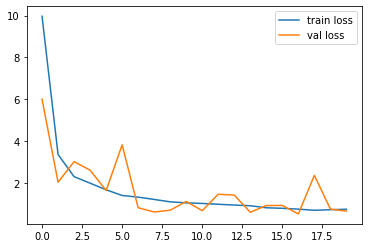

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss(Vgg19)')

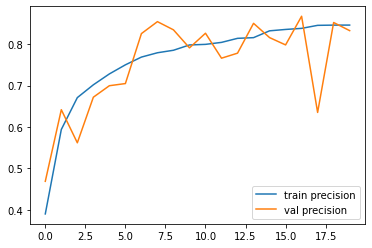

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the precision
plt.plot(r.history['Precision'], label='train precision')
plt.plot(r.history['val_Precision'], label='val precision')
plt.legend()
plt.show()
plt.savefig('PrecisionVal_precision(Vgg19)')

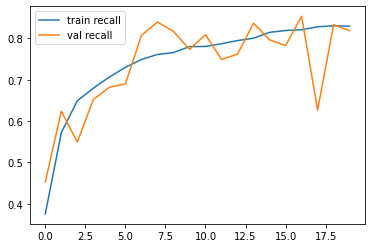

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the recall
plt.plot(r.history['Recall'], label='train recall')
plt.plot(r.history['val_Recall'], label='val recall')
plt.legend()
plt.show()
plt.savefig('RecallVal_recall(Vgg19)')

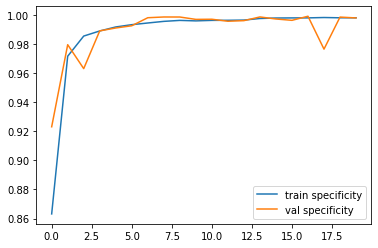

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the specificity_at_sensitivity
plt.plot(r.history['Specificity'], label='train specificity')
plt.plot(r.history['val_Specificity'], label='val specificity')
plt.legend()
plt.show()
plt.savefig('Specificity(Vgg19)')

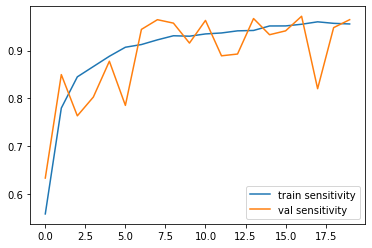

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the sensitivity_at_specificity
plt.plot(r.history['Sensitivity'], label='train sensitivity')
plt.plot(r.history['val_Sensitivity'], label='val sensitivity')
plt.legend()
plt.show()
plt.savefig('sensitivity(Vgg19)')

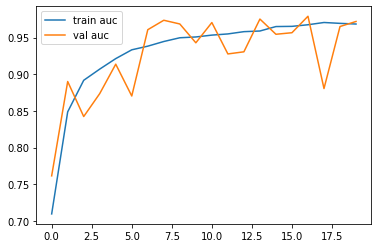

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the AUC
plt.plot(r.history['AUC'], label='train auc')
plt.plot(r.history['val_AUC'], label='val auc')
plt.legend()
plt.show()
plt.savefig('AucVal_auc(Vgg19)')

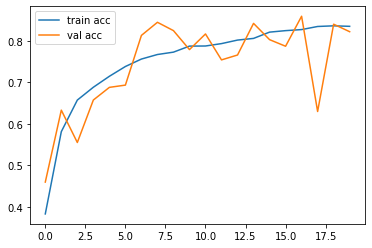

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc(Vgg19)')